In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functools import reduce

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [2]:
def merge_df(left,right):
   return pd.merge(left,right,how='outer',on='Timepoint')

In [3]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
merged_data = pd.merge(clinical_trial_data, mouse_drug_data, on = "Mouse ID", how="left")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Mean_tumor_vol = merged_data.groupby(["Drug","Timepoint"]).mean()
Mean_tumor_vol.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [7]:
# Convert to DataFrame
Mean_tumor_vol_df = pd.DataFrame(Mean_tumor_vol)

# Preview DataFrame
Mean_tumor_vol_df.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [8]:
mean_tumor_tumor_final=Mean_tumor_vol_df["Tumor Volume (mm3)"].reset_index()
mean_tumor_tumor_final.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_tumor_vol = merged_data.groupby(["Drug","Timepoint"]).sem().reset_index()
std_tumor_vol.head()

,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731


In [10]:
# Convert to DataFrame
std_tumor_vol_final=std_tumor_vol["Tumor Volume (mm3)"].reset_index()
std_tumor_vol_final.head()
# Preview DataFrame
test_df=pd.DataFrame(std_tumor_vol_final)
test_df.head(20)

,index,Tumor Volume (mm3)
0,0,0.000000
1,1,0.448593
2,2,0.702684
3,3,0.838617
4,4,0.909731
5,5,0.881642
6,6,0.934460
7,7,1.052241
8,8,1.223608
9,9,1.223977


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_tumor_final_pd=pd.DataFrame(mean_tumor_tumor_final)
mean_tumor_tumor_final_pd.head()

drug_name=mean_tumor_tumor_final.Drug.unique()
print(drug_name)



['Capomulin' 'Ceftamin' 'Infubinol' 'Ketapril' 'Naftisol' 'Placebo'
 'Propriva' 'Ramicane' 'Stelasyn' 'Zoniferol']


In [62]:
# check the number of timepoint
num_TimePoint = len(mean_tumor_tumor_final_pd)/len(drug_name)
num_TimePoint

10.0

In [44]:
# check the data calling 
mean_tumor_tumor_final.loc[0:num_TimePoint-1,["Timepoint","Tumor Volume (mm3)"]]

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,44.266086
2,10,43.084291
3,15,42.064317
4,20,40.716325
5,25,39.939528
6,30,38.769339
7,35,37.816839
8,40,36.958001
9,45,36.236114


In [14]:
# separate dataset and error into drug_name columns
# colum length = 0: num_TimePoint-1
# loop to get all data for each drug
store_TimePoint =[]
store_err=[]
for i in range (len(drug_name)):
    tmp=mean_tumor_tumor_final_pd.loc[(i*num_TimePoint):(i*num_TimePoint+num_TimePoint-1),["Timepoint","Tumor Volume (mm3)"]]
    print("\n",tmp)
    store_TimePoint.append(tmp)
    
    # error 
    tmp=std_tumor_vol.loc[(i*num_TimePoint):(i*num_TimePoint+num_TimePoint-1),["Timepoint","Tumor Volume (mm3)"]]
    print("\n",tmp)
    store_err.append(tmp)


    Timepoint  Tumor Volume (mm3)
0          0           45.000000
1          5           44.266086
2         10           43.084291
3         15           42.064317
4         20           40.716325
5         25           39.939528
6         30           38.769339
7         35           37.816839
8         40           36.958001
9         45           36.236114

    Timepoint  Tumor Volume (mm3)
0          0            0.000000
1          5            0.448593
2         10            0.702684
3         15            0.838617
4         20            0.909731
5         25            0.881642
6         30            0.934460
7         35            1.052241
8         40            1.223608
9         45            1.223977

     Timepoint  Tumor Volume (mm3)
10          0           45.000000
11          5           46.503051
12         10           48.285125
13         15           50.094055
14         20           52.157049
15         25           54.287674
16         30           56.769

In [50]:
# merge data per column with reduce and rename columns
data_frames =["Drug"]
data_frames = [store_TimePoint[i] for i in range (len(drug_name))]

df_merged = reduce(merge_df, data_frames)

df_merged.columns = ["Timepoint" , drug_name[0], drug_name[1], drug_name[2], drug_name[3], drug_name[4],\
                              drug_name[5], drug_name[6], drug_name[7], drug_name[8], drug_name[9]]

# repeat for error
data_error = [store_err[i] for i in range (len(drug_name))]
df_merged_err = reduce(merge_df, data_error)

df_merged_err.columns = ["Timepoint" , drug_name[0], drug_name[1], drug_name[2], drug_name[3], drug_name[4],\
                              drug_name[5], drug_name[6], drug_name[7], drug_name[8], drug_name[9]]
df_merged_err.head()

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [49]:
# create a pivot table
table=pd.pivot_table(df_merged,index=['Timepoint'])

# Preview that Reformatting worked
table



,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


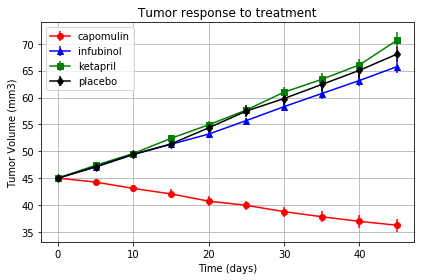

In [31]:
# Generate the Plot (with Error Bars)
time = mean_tumor_tumor_final.loc[0:9,["Timepoint"]]

#create data to plot
tumor_vol_capomulin=df_merged.loc[:,["Capomulin"]]
tumor_vol_infubinol=df_merged.loc[:,["Infubinol"]]
tumor_vol_ketapril=df_merged.loc[:,["Ketapril"]]
tumor_vol_placebo=df_merged.loc[:,["Placebo"]]

# create error data for each drug
std_tumor_vol_capomulin=df_merged_err.loc[:,["Capomulin"]].astype(float)
std_tumor_vol_infubinol=df_merged_err.loc[:,["Infubinol"]].astype(float)
std_tumor_vol_ketapril=df_merged_err.loc[:,["Ketapril"]]
std_tumor_vol_placebo=df_merged_err.loc[:,["Placebo"]]

# plot tumor vol = f(time)
plt.errorbar(time.values,tumor_vol_capomulin.values,yerr=std_tumor_vol_capomulin.values, \
             color='red',marker='o',label="capomulin")
plt.errorbar(time.values,tumor_vol_infubinol.values,yerr= std_tumor_vol_infubinol.values, \
             color='blue',marker='^',label="infubinol")

plt.errorbar(time.values,tumor_vol_ketapril.values,yerr= std_tumor_vol_ketapril.values, \
             color='green',marker='s',label="ketapril")
#
plt.errorbar(time.values,tumor_vol_placebo.values,yerr= std_tumor_vol_placebo.values, \
            color='black',marker='d',label="placebo")

#plt.errorbar(time, tumor_vol_capomulin, yerr=tumor_vol_capomulin,color='red',marker='o',label="capomulin")

plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.title("Tumor response to treatment")

plt.tight_layout()
# save fig
plt.savefig("Images/Tumor_volume_time.png")
plt.show()

In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [34]:
# check dataset
Mean_tumor_vol.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [75]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site = Mean_tumor_vol.loc[:,["Metastatic Sites"]].reset_index()

# Convert to DataFrame
mean_met_site_df = pd.DataFrame(mean_met_site)
# Preview DataFrame
mean_met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [77]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_met_site= std_tumor_vol.loc[:,["Metastatic Sites"]]

# Convert to DataFrame
std_met_site_df = pd.DataFrame(std_met_site)
# Preview DataFrame
std_met_site_df.head()

,Metastatic Sites
0,0.000000
1,0.074833
2,0.125433
3,0.132048
4,0.161621


In [79]:
mean_met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [82]:
# Minor Data Munging to Re-Format the Data Frames
# separate dataset and error into drug_name columns
# colum length = 0: num_TimePoint-1
# loop to get all data for each drug
store_met_site=[]
store_err=[]
for i in range (len(drug_name)):
    tmp=mean_met_site_df.loc[(i*num_TimePoint):(i*num_TimePoint+num_TimePoint-1),["Timepoint","Metastatic Sites"]]
    print("\n",tmp)
    store_met_site.append(tmp)
    
    # error 
    tmp=std_met_site_df.loc[(i*num_TimePoint):(i*num_TimePoint+num_TimePoint-1),["Timepoint","Metastatic Sites"]]
    print("\n",tmp)
    store_err.append(tmp)
# Preview that Reformatting worked



    Timepoint  Metastatic Sites
0          0          0.000000
1          5          0.160000
2         10          0.320000
3         15          0.375000
4         20          0.652174
5         25          0.818182
6         30          1.090909
7         35          1.181818
8         40          1.380952
9         45          1.476190

    Timepoint  Metastatic Sites
0        NaN          0.000000
1        NaN          0.074833
2        NaN          0.125433
3        NaN          0.132048
4        NaN          0.161621
5        NaN          0.181818
6        NaN          0.172944
7        NaN          0.169496
8        NaN          0.175610
9        NaN          0.202591

     Timepoint  Metastatic Sites
10          0          0.000000
11          5          0.380952
12         10          0.600000
13         15          0.789474
14         20          1.111111
15         25          1.500000
16         30          1.937500
17         35          2.071429
18         40          2

In [ ]:
# merge data per column with reduce and rename columns
data_frames =["Drug"]
data_frames = [store_met_site[i] for i in range (len(drug_name))]

df_merged = reduce(merge_df, data_frames)

df_merged.columns = ["Timepoint" , drug_name[0], drug_name[1], drug_name[2], drug_name[3], drug_name[4],\
                              drug_name[5], drug_name[6], drug_name[7], drug_name[8], drug_name[9]]

# repeat for error
data_error = [store_err[i] for i in range (len(drug_name))]
df_merged_err = reduce(merge_df, data_error)

df_merged_err.columns = ["Timepoint" , drug_name[0], drug_name[1], drug_name[2], drug_name[3], drug_name[4],\
                              drug_name[5], drug_name[6], drug_name[7], drug_name[8], drug_name[9]]
df_merged_err.head()

In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()